# Task 1: Data extraction and initial analysis

### Importing necessary libraries

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [4]:
df = pd.read_csv('E:\My Work\Virtual Internship\BCGX\EDGAR Entity Extracted Data.csv')

In [5]:
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2021,1.680880e+11,6.127100e+10,3.013110e+11,1.761300e+11,7.690300e+10
1,Microsoft,2022,2.028250e+11,6.640400e+10,3.659450e+11,2.150190e+11,8.269300e+10
2,Microsoft,2023,2.611620e+11,8.913200e+10,4.564250e+11,2.662930e+11,1.056460e+11
3,Tesla,2021,3.153600e+10,7.210000e+08,5.214800e+10,3.380000e+10,5.839000e+09
4,Tesla,2022,5.618600e+10,1.775000e+09,1.010580e+11,6.405400e+10,8.765000e+09
5,Tesla,2023,9.802700e+10,6.663000e+09,1.474450e+11,9.714600e+10,1.282900e+10
6,Apple,2021,3.471600e+11,7.401000e+10,3.540500e+11,2.585500e+11,9.531000e+10
7,Apple,2022,3.657200e+11,8.604000e+10,3.808400e+11,2.788800e+11,1.085500e+11
8,Apple,2023,3.839100e+11,9.236000e+10,4.148900e+11,3.058100e+11,1.154900e+11


In [6]:
# Set pandas to display float numbers in standard notation
pd.options.display.float_format = '{:.2f}'.format

### Analyzing trends with pandas:

In [7]:
# Calculate year-over-year percentage changes for each financial metric
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100


In [8]:
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,Microsoft,2021,168088000000.00,61271000000.00,301311000000.00,176130000000.00,76903000000.00,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,202825000000.00,66404000000.00,365945000000.00,215019000000.00,82693000000.00,20.67,8.38,21.45,22.08,7.53
2,Microsoft,2023,261162000000.00,89132000000.00,456425000000.00,266293000000.00,105646000000.00,28.76,34.23,24.73,23.85,27.76
3,Tesla,2021,31536000000.00,721000000.00,52148000000.00,33800000000.00,5839000000.00,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,56186000000.00,1775000000.00,101058000000.00,64054000000.00,8765000000.00,78.16,146.19,93.79,89.51,50.11
5,Tesla,2023,98027000000.00,6663000000.00,147445000000.00,97146000000.00,12829000000.00,74.47,275.38,45.90,51.66,46.37
6,Apple,2021,347160000000.00,74010000000.00,354050000000.00,258550000000.00,95310000000.00,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,365720000000.00,86040000000.00,380840000000.00,278880000000.00,108550000000.00,5.35,16.25,7.57,7.86,13.89
8,Apple,2023,383910000000.00,92360000000.00,414890000000.00,305810000000.00,115490000000.00,4.97,7.35,8.94,9.66,6.39


In [16]:
df.to_csv('trends_data.csv')

In [14]:
# Group by 'Company' and compute the mean growth percentages
summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Assets Growth (%)': 'mean',
    'Liabilities Growth (%)': 'mean',
    'Cash Flow Growth (%)': 'mean'
}).reset_index()

print(summary.to_string(index=False))


  Company  Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)  Liabilities Growth (%)  Cash Flow Growth (%)
    Apple                5.16                  11.80               8.25                    8.76                 10.14
Microsoft               24.71                  21.30              23.09                   22.96                 17.64
    Tesla               76.32                 210.78              69.85                   70.59                 48.24


In [15]:
summary.to_csv('summary_trends_data.csv')

In [11]:
# Summary statistics for financial metrics
summary_stats = df.groupby('Company').agg({
    'Total Revenue': ['mean', 'std'],
    'Net Income': ['mean', 'std'],
    'Total Assets': ['mean', 'std'],
    'Total Liabilities': ['mean', 'std'],
    'Cash Flow from Operating Activities': ['mean', 'std']
})

print(summary_stats.to_string(index=False))

  Total Revenue                    Net Income                   Total Assets                Total Liabilities                Cash Flow from Operating Activities               
           mean            std           mean            std            mean            std              mean            std                                mean            std
365596666666.67 18375310428.22 84136666666.67  9321890008.65 383260000000.00 30492108815.23   281080000000.00 23706684711.28                     106450000000.00 10252589916.70
210691666666.67 47033027781.90 72269000000.00 14827592488.33 374560333333.33 77915057757.36   219147333333.33 45223047158.87                      88414000000.00 15201558900.32
 61916333333.33 33613848490.37  3053000000.00  3170458011.08 100217000000.00 47654066069.96    65000000000.00 31683593798.68                       9144333333.33  3510405294.74


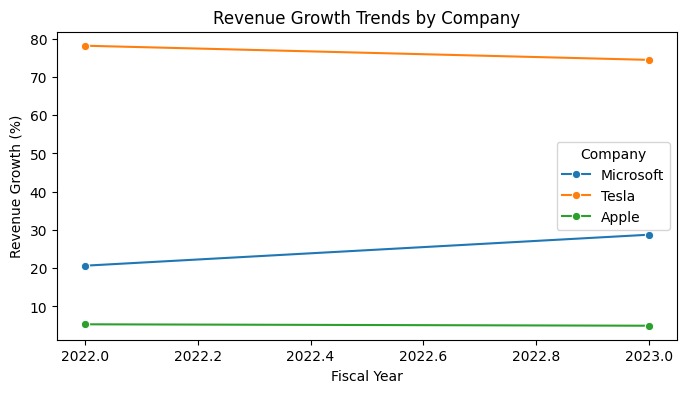

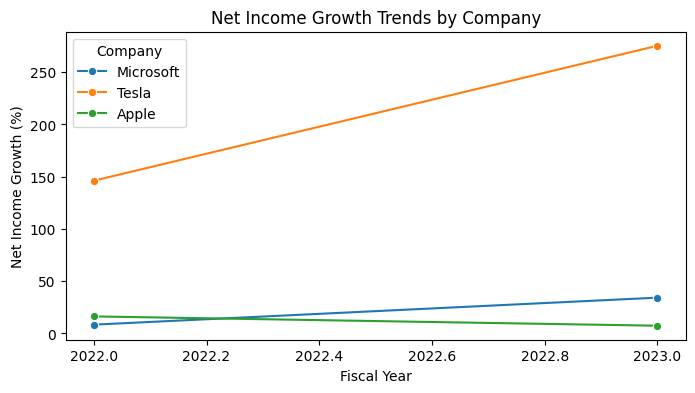

In [12]:
# Plotting revenue growth for each company
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Fiscal Year', y='Revenue Growth (%)', hue='Company', marker='o')
plt.title('Revenue Growth Trends by Company')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue Growth (%)')
plt.legend(title='Company')
plt.show()

# Plotting net income growth for each company
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Fiscal Year', y='Net Income Growth (%)', hue='Company', marker='o')
plt.title('Net Income Growth Trends by Company')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income Growth (%)')
plt.legend(title='Company')
plt.show()

In [13]:
# Correlation matrix for each company
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    correlation_matrix = company_data[['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow from Operating Activities']].corr()
    print(f"Correlation Matrix for {company}:")
    print(correlation_matrix.to_string()) 
    print("\n")

Correlation Matrix for Microsoft:
                                     Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow from Operating Activities
Total Revenue                                 1.00        0.98          1.00               1.00                                 0.98
Net Income                                    0.98        1.00          0.97               0.96                                 1.00
Total Assets                                  1.00        0.97          1.00               1.00                                 0.97
Total Liabilities                             1.00        0.96          1.00               1.00                                 0.97
Cash Flow from Operating Activities           0.98        1.00          0.97               0.97                                 1.00


Correlation Matrix for Tesla:
                                     Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow from Operating Activities
Tot

### Summarizing findings:

#### As per Growth Trends
#### Apple:
* Revenue Growth: Apple experienced a moderate revenue growth of 5.16%.
* Net Income Growth: The company's net income grew by 11.80%, reflecting a steady increase in profitability.
* Assets Growth: Apple's assets grew by 8.25%, indicating a stable expansion of its asset base.
* Liabilities Growth: Liabilities increased by 8.76%, aligning closely with asset growth.
* Cash Flow Growth: Cash flow from operations grew by 10.14%, showing healthy operational efficiency.
#### Microsoft:
* Revenue Growth: Microsoft saw a significant revenue growth of 24.71%, demonstrating strong market performance.
* Net Income Growth: Net income increased by 21.30%, indicating robust profitability.
* Assets Growth: The company’s assets grew by 23.09%, suggesting considerable expansion.
* Liabilities Growth: Liabilities grew by 22.96%, which is consistent with the growth in assets.
* Cash Flow Growth: Cash flow from operations increased by 17.64%, reflecting strong cash generation.
#### Tesla:
* Revenue Growth: Tesla exhibited an impressive revenue growth of 76.32%, underscoring its rapid market expansion.
* Net Income Growth: The company’s net income skyrocketed by 210.78%, reflecting exceptional profitability improvements.
* Assets Growth: Tesla’s assets grew by 69.85%, showing significant growth.
* Liabilities Growth: Liabilities grew by 70.59%, almost matching the growth in assets.
* Cash Flow Growth: Cash flow from operations increased by 48.24%, indicating strong operational cash generation.

These trends highlight the varying levels of growth and financial performance across the three companies, with Tesla showing the most dramatic growth in both revenue and net income, while Microsoft maintained strong and steady growth across all metrics. Apple demonstrated consistent and moderate growth, reflecting its established market presence.